In [1]:
using Plots
using LinearAlgebra
using LaTeXStrings
using StatsBase
using CSV
using DataFrames

In [2]:
t_start = time();

## Parameters:

In [3]:
t0 = 1.0;
t = 1.0;

Delta = 1.0;
x_periodic = 0;
y_periodic = 0;

L = 60;

Lx = L;
Ly = L;

m_0array = range(-2.5,2.5,41);
exportdata=1;

Equation of two lines are $y = mx + c_1$ and $y = mx + c_2$

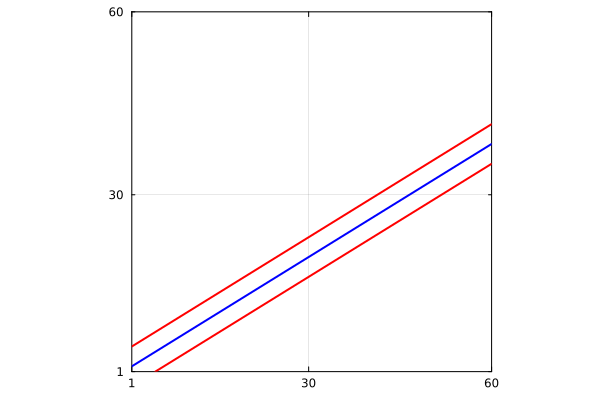

In [4]:
m = (-1+sqrt(5))/2
# m=2/3;
c1 = -2
c2 = 4.5

# c1 = -4;
# c2 = 6;

function line_down(x::Float64)
    return c1 + m*x
end

function line_up(x::Float64)
    return c2 + m*x
end

function line_middle(x::Float64)
    return (line_up(x) + line_down(x))/2
end

line_x = [1.0,L]
line_down_y = line_down.(line_x)
line_up_y = line_up.(line_x)

plt000= plot(line_x,line_down_y,color="red",width=2, xlims=(1,Lx),ylims=(1,Ly),legend=:none,aspect_ratio=:equal,frame=:box, framestyle=:thick,xticks=[1,Lx/2,Lx],yticks=[1,Ly/2,Ly])
plt000=plot!(line_x,line_up_y,color="red",width=2)
plt000=plot!(line_x,line_middle.(line_x),color="blue",width=2)

In [5]:
points_x_array = range(1, L,L)
points_y_array = range(1, L,L)

points2 = zeros(2*L^2)
for ii = 1:L
    for jj = 1:L
        points2[2*((jj-1)*L+ii)-1] = points_x_array[ii]
        points2[2*((jj-1)*L+ii)] = points_y_array[jj]
    end
end


### These arrays have N^2 elements, and hold the x and y coordinates of nth site
points_x_array = points2[1:2:end]
points_y_array =  points2[2:2:end]

site_index = range(1,L^2, L^2)

1.0:1.0:3600.0

In [6]:
# Define the folder path (relative or absolute)
folder_path = "data/HOTI/"  # Change to your desired folder
# Ensure the folder exists
isdir(folder_path) || mkdir(folder_path)

filename = "t0=$(t0)_t=$(t)_Delta=$(Delta)_x_periodic=$(x_periodic)_y_periodic=$(y_periodic)_L=$(L)_m=$(m)_c1=$(c1)_c2=$(c2).csv"


"t0=1.0_t=1.0_Delta=1.0_x_periodic=0_y_periodic=0_L=60_m=0.6180339887498949_c1=-2_c2=4.5.csv"

### Now we isolate the PTB points

### The array PTB_index (with number of elements N_PTB) contains the parent lattice indices contained in PTB

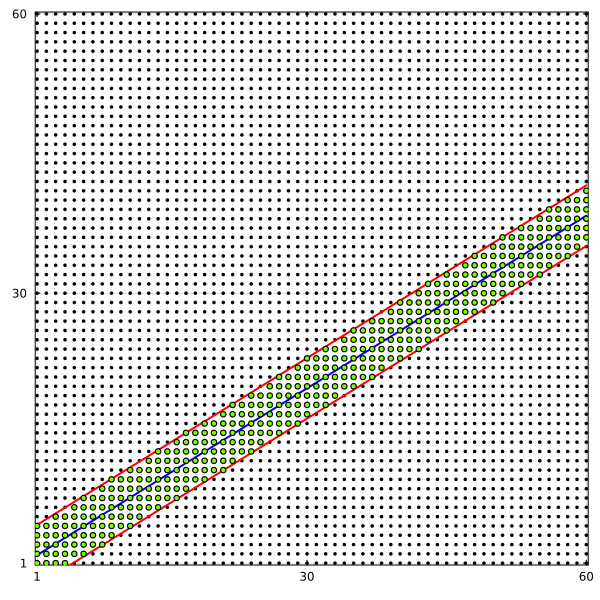

In [7]:
### PTB_index will contain ordered indices of the sites in PTB

PTB_index_dummy = collect(range(1,L^2,L^2))
for ii = 1:L^2
    if (points_y_array[ii] >= line_down(points_x_array[ii])) && (points_y_array[ii] <= line_up(points_x_array[ii]))
        ## Do nothing
    else
        PTB_index_dummy[ii] = 0.0
    end
end

## Here we store non-zero indices
PTB_index = findall(!iszero, PTB_index_dummy)

N_PTB = size(PTB_index)[1]

points_PTB_array_x = zeros(N_PTB)
points_PTB_array_y = zeros(N_PTB)

for ii = 1:N_PTB
    points_PTB_array_x[ii] = points_x_array[PTB_index[ii]]
    points_PTB_array_y[ii] = points_y_array[PTB_index[ii]]
end

### Draw lines separating PTB
line_x = [1.0,L]
line_down_y = line_down.(line_x)
line_up_y = line_up.(line_x)

plt_lattice=scatter(points_x_array, points_y_array,aspect_ratio=1,legend=false, 
                    xlims=[0.8,L+0.2], ylims=[0.8,L+0.2],color="black",markersize=2, frame=:box, framestyle=:thick, xticks=[1,Lx/2,Lx],yticks=[1,Ly/2,Ly], size=(600,600))
plt_lattice=plot!(line_x,line_down_y,color="red",width=2)
plt_lattice=plot!(line_x,line_up_y,color="red",width=2)
plt_lattice=plot!(line_x,line_middle.(line_x),color="blue",width=2)
plt_lattice=scatter!(points_PTB_array_x, points_PTB_array_y,color="lawngreen",aspect_ratio=1,legend=false,markersize=3)

4.0,3.0
55.0,38.0


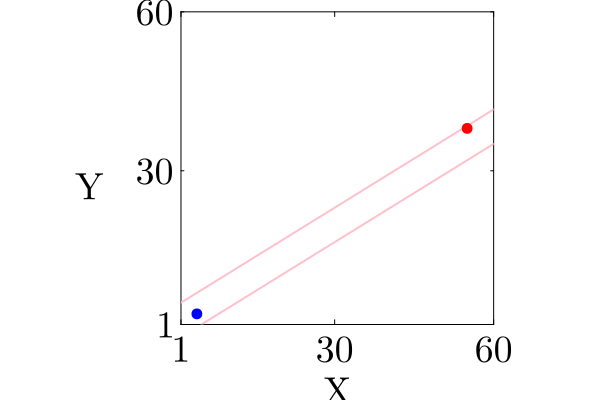

In [8]:
PTB_index[14],PTB_index[N_PTB-14]

### FIrst point
println(points_x_array[PTB_index[14]],",", points_y_array[PTB_index[14]])
println(points_x_array[PTB_index[N_PTB-14]],",", points_y_array[PTB_index[N_PTB-14]])


#### Show these points on the plot plt001
plt001 = plot(
    line_x, line_down_y,
    color="pink",
    width=2,
    xlims=(1, Lx),
    ylims=(1, Ly),
    legend=false,
    aspect_ratio=:equal,
    frame=:box,
    framestyle=:thick,
    xticks=[1, Lx/2, Lx],
    yticks=[1, Ly/2, Ly],
    xlabel="X",
    ylabel="Y",
    yguidefontrotation = 270, # Rotates the Y label vertically
    tickfont=font(24, "Computer Modern"),
    guidefont=font(24, "Computer Modern"),
    titlefont=font(24, "Computer Modern"),
    grid=false
)
plt001 = plot!(line_x, line_up_y, color="pink", width=2)
plt001 = scatter!(
    [points_x_array[PTB_index[14]]], [points_y_array[PTB_index[14]]],
    label="Point 14",
    color=:blue,
    markersize=6,
    markerstrokewidth=0
)
plt001 = scatter!(
    [points_x_array[PTB_index[N_PTB-14]]], [points_y_array[PTB_index[N_PTB-14]]],
    label="Point N_PTB-14",
    color=:red,
    markersize=6,
    markerstrokewidth=0
)

In [9]:
### Save the plot as pdf at the same location
### Save the plot as pdf at the same location
isdir(string(folder_path,"localizer_index/")) || mkdir(string(folder_path,"localizer_index/"))
savefig(plt001, string(folder_path,"localizer_index/","special_points", filename, ".pdf"))

"/work/submit/archi137/Documents/GitHub/lattices-julia/data/HOTI/localizer_index/special_pointst0=1.0_t=1.0_Delta=1.0_x_periodic=0_y_periodic=0_L=60_m=0.6180339887498949_c1=-2_c2=4.5.csv.pdf"

## Percentage of sites in PTB

In [10]:
println("Number of sites in PTB = ",N_PTB)
println("Amount of sites in PTB = ",100* N_PTB/L^2, " %")

Number of sites in PTB = 386
Amount of sites in PTB = 10.722222222222221 %


In [11]:
println(PTB_index)

[1, 2, 3, 4, 61, 62, 63, 64, 65, 66, 121, 122, 123, 124, 125, 126, 127, 128, 181, 182, 183, 184, 185, 186, 187, 188, 189, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1227, 1

## Coordinates of projected sites

### Equation of line_down is $y=mx + c_1$
### Equation of projector line is, $y-y_1 = (-1/m).(x-x_1)$, where $(x_1,y_1)$ is the coordinate of the site
### The two lines intersect at $((m.y_1 + x_1 - m.c_1)/(m^2 + 1), (m^2.y_1 + m.x_1 + c_1)/(m^2 + 1))$

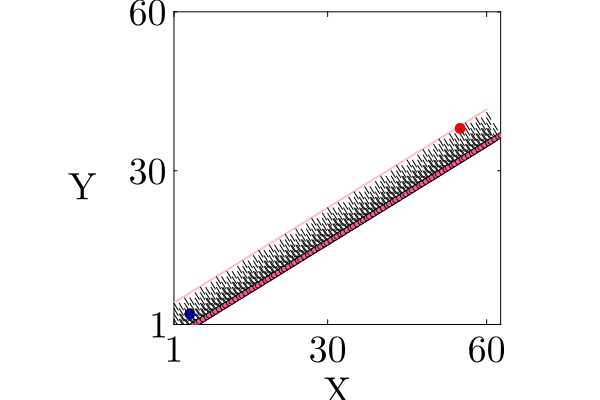

In [12]:
projected_points_PTB_array_x = (m*points_PTB_array_y + points_PTB_array_x - m*ones(N_PTB)*c1)/(m^2 + 1);
projected_points_PTB_array_y = m*projected_points_PTB_array_x + c1 * ones(N_PTB);

## This array contains distance along the line
## This should be x coordinates on the line * sec(theta), where the slope is tan(theta) = m
distance_along_projected_line = projected_points_PTB_array_x * sqrt(m^2 +1)

for ii = 1:N_PTB
    line_projected_x = [points_PTB_array_x[ii],projected_points_PTB_array_x[ii]]
    line_projected_y = [points_PTB_array_y[ii],projected_points_PTB_array_y[ii]]
    plt_lattice=plot!(line_projected_x,line_projected_y,linestyle=:dash, color="black")
end
plt_lattice=scatter!(projected_points_PTB_array_x,projected_points_PTB_array_y, 
            xlims=(1,maximum(vcat(projected_points_PTB_array_x,Lx))), ylims=(1,maximum(vcat(projected_points_PTB_array_y,Ly))), markersize=3)
display(plt_lattice)

In [14]:
function matrix_signature(LMaxtrix)
    eigsL = eigvals(LMaxtrix);
    pos_count = 0;
    neg_count = 0;
    for eig in eigsL
        if real(eig) > 0
            pos_count += 1;
        elseif real(eig) < 0
            neg_count += 1;
        end
    end
    return (pos_count - neg_count)
end

matrix_signature (generic function with 1 method)

In [15]:
## This function pltos density in the parent lattice
function plotState(local_density, Lx, Ly)
	
	density = zeros(Lx,Ly)

	for a = 1:Lx
		for b = 1:Ly
			density[a,b] = local_density[a + (b-1)*Lx];
		end
	end

	
	xx = range(1, stop=Lx, length=Lx)
	yy = range(1, stop=Ly, length=Ly)

	xx = repeat(xx, 1, Ly)'
	yy = repeat(yy, 1, Lx)

	# point_size = 500 * vec(density')

plt = scatter(
    vec(xx), vec(yy),
    marker_z = vec(density'),
    color = cgrad([:white, :red]), # Consider cgrad(:viridis) for colorblind-friendly
    legend = false,
    xlabel = "X",
    ylabel = "Y",
    title = "Joint LDoS zero energy states",
    markerstrokewidth = 0,
    aspect_ratio = 1,
    colorbar_title = "Density",
    colorbar = true,
    yguidefontrotation = 270, # Rotates the Y label vertically
    framestyle = :box,
    xlims = (0.5, Lx + 0.5),
    ylims = (0.5, Ly + 0.5),
    xticks = [1, Lx ÷ 2, Lx],
    yticks = [1, Ly ÷ 2, Ly],
    markersize = 8,
    tickfont = font(18, "Computer Modern"),
    guidefont = font(22, "Computer Modern"),
    titlefont = font(24, "Computer Modern"),
    colorbar_tickfont = font(16, "Computer Modern"),
    colorbar_titlefont = font(18, "Computer Modern"),
    grid = false,
    size = (700, 700)
)

plt = plot!(line_x,line_down_y,color="red",width=2, xlims=(0,Lx+1),ylims=(0,Ly+1),legend=:none,aspect_ratio=:equal,frame=:box, framestyle=:thick,xticks=[1,Lx/2,Lx],yticks=[1,Ly/2,Ly])
plt = plot!(line_x,line_up_y,color="red",width=2)
plt = plot!(line_x,line_middle.(line_x),color="blue",width=2)

return plt

end

plotState (generic function with 1 method)

In [16]:
function state_to_real_space_LDoS(v::Array{ComplexF64})
    n_sites = Int(size(v)[1]/4)
    prob_dist = zeros(n_sites)
    for ii = 1:n_sites
        prob_dist[ii] = abs(v[4*ii-3])^2 +  abs(v[4*ii-2])^2 + abs(v[4*ii-1])^2 + abs(v[4*ii])^2
    end
    return prob_dist
end 

state_to_real_space_LDoS (generic function with 1 method)

In [17]:
function plotPTB_state_in_parent_lattice(v::Array{ComplexF64}, Lx, Ly)
    local_density_on_PTB = state_to_real_space_LDoS(v)

    local_density_on_lattice = zeros(Lx*Ly)
    for ii = 1:length(local_density_on_PTB)
        local_density_on_lattice[Int(PTB_index[ii])] = local_density_on_PTB[ii]
    end
    plotState(local_density_on_lattice, Lx, Ly)
end

plotPTB_state_in_parent_lattice (generic function with 1 method)

In [18]:
function plotPTB_density_in_parent_lattice(v::Array{Float64}, Lx, Ly)
    local_density_on_lattice = zeros(Lx*Ly)
    for ii = 1:length(v)
        local_density_on_lattice[Int(PTB_index[ii])] = v[ii]
    end
    plotState(local_density_on_lattice, Lx, Ly)
end

plotPTB_density_in_parent_lattice (generic function with 1 method)

In [19]:

const_mat_PTB_orbitals = zeros(4*N_PTB,4*N_PTB);
for ii = 1:4*N_PTB
    const_mat_PTB_orbitals[ii,ii] = 1;
end

const_mat_PTB_sites = zeros(N_PTB,N_PTB);
for ii = 1:N_PTB
    const_mat_PTB_sites[ii,ii] = 1;
end

## Generate Parent Hamiltonian

In [20]:
include("generate_matrices1D.jl")
include("generate_matrices2D.jl")
include("angmom.jl")

generate_spin_matrices (generic function with 1 method)

In [21]:
println("t = ",t)
println("Delta = ",Delta)
println("Lx = ", Lx)
println("Ly = ", Ly)

t = 1.0
Delta = 1.0
Lx = 60
Ly = 60


In [22]:
if(x_periodic^2 != x_periodic || y_periodic^2 != y_periodic)
    println("x_periodic and y_periodic must be 0 or 1")
    println("You entered x_periodic = ", x_periodic, " y_periodic = ", y_periodic)
    return
end

In [23]:
sigma_x = [0 1;
           1 0];
sigma_y = [0 -im;
           im 0];
sigma_z = [1 0;
           0 -1];
eye2 = [1 0;
        0 1];
gamma_01 = kron(eye2, sigma_x);
gamma_02 = kron(eye2, sigma_y);
gamma_03 = kron(eye2, sigma_z);
gamma_10 = kron(sigma_x, eye2);
gamma_13 = kron(sigma_x, sigma_z);
gamma_20 = kron(sigma_y, eye2);
gamma_30 = kron(sigma_z, eye2);
gamma_31 = kron(sigma_z, sigma_x);
gamma_32 = kron(sigma_z, sigma_y);
gamma_33 = kron(sigma_z, sigma_z);

In [24]:
const_2D, CX2D, SX2D, CY2D, SY2D, CXCY2D, SXCY2D, CXSY2D = generate_matrices_2D(Lx,Ly,x_periodic,y_periodic)

CXCY2D= Nothing
SXCY2D= Nothing
CXSY2D= Nothing

Verified: Building Block Matrices are Hermitian


Nothing

In [25]:
PTB_orbital_index = ones(4*N_PTB);
for ii = 1:N_PTB
    PTB_orbital_index[4*ii-3] = 4*PTB_index[ii]-3
    PTB_orbital_index[4*ii-2] = 4*PTB_index[ii]-2
    PTB_orbital_index[4*ii-1] = 4*PTB_index[ii]-1
    PTB_orbital_index[4*ii] = 4*PTB_index[ii]
end
println(PTB_orbital_index)

outside_orbital_index = setdiff(1:4*Lx*Ly,PTB_orbital_index);
println(outside_orbital_index)

NOrbitalsOutside = 4*Lx*Ly - 4*N_PTB

NOrbitalsInside = 4*N_PTB

H_PTB_renor = zeros(NOrbitalsInside,NOrbitalsInside)*im;

H_11 = zeros(NOrbitalsInside,NOrbitalsInside)*im;

H_22 = zeros(NOrbitalsOutside,NOrbitalsOutside)*im;

H_21 = zeros(NOrbitalsOutside,NOrbitalsInside)*im;

H_12 = zeros(NOrbitalsInside,NOrbitalsOutside)*im;

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 241.0, 242.0, 243.0, 244.0, 245.0, 246.0, 247.0, 248.0, 249.0, 250.0, 251.0, 252.0, 253.0, 254.0, 255.0, 256.0, 257.0, 258.0, 259.0, 260.0, 261.0, 262.0, 263.0, 264.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 721.0, 722.0, 723.0, 724.0, 725.0, 726.0, 727.0, 728.0, 729.0, 730.0, 731.0, 732.0, 733.0, 734.0, 735.0, 736.0, 737.0, 738.0, 739.0, 740.0, 741.0, 742.0, 743.0, 744.0, 745.0, 746.0, 747.0, 748.0, 749.0, 750.0, 751.0, 752.0, 753.0, 754.0, 755.0, 756.0, 961.0, 962.0, 963.0, 964.0, 965.0, 966.0, 967.0, 968.0, 969.0, 970.0, 971.0, 972.0, 973.0, 974.0, 975.0, 976.0, 977.0, 978.0, 979.0, 980.0, 981.0, 982.0, 983.0, 984.0, 985.0, 986.0, 987.0, 988.0, 989.0, 990.0, 991.0, 992.0, 993.0, 994.0, 995.0, 996.0, 997.0, 998.0, 99

In [26]:
chiral_matrix = kron(const_mat_PTB_sites,gamma_20);

In [27]:
## Store the x and y coordinates of the sites in PTB
YList_PTB = ceil.(PTB_index/Lx);
XList_PTB = PTB_index - (YList_PTB - ones(N_PTB))*Lx;
## Kronecker product to get the orbitals
XListKron_PTB = kron(XList_PTB,[1,1,1,1]);
YListKron_PTB = kron(YList_PTB,[1,1,1,1]);

X1_PTB = diagm(XListKron_PTB);
Y1_PTB = diagm(YListKron_PTB);

dlist_PTB = (X1_PTB + Y1_PTB)/2;

In [28]:
localizer_vals_all1 = zeros(length(m_0array));
localizer_vals_all2 = zeros(length(m_0array));

for jjjj = 1:length(m_0array)
    m_0 = m_0array[jjjj];
    println("m_0 = ", m_0)

    h_2DHO = t*kron(SX2D,gamma_31) + t*kron(SY2D,gamma_32) + kron(m_0*const_2D + t0*(CX2D + CY2D),gamma_33) + Delta*kron(CX2D - CY2D,gamma_10)



for ii = 1:NOrbitalsInside
    for jj = 1:NOrbitalsInside
        H_11[ii,jj] = h_2DHO[Int(PTB_orbital_index[ii]), Int(PTB_orbital_index[jj])]
    end
end

Threads.@threads for ii = 1:NOrbitalsOutside
    for jj = 1:NOrbitalsOutside
        H_22[ii,jj] = h_2DHO[Int(outside_orbital_index[ii]), Int(outside_orbital_index[jj])]
    end
end

Threads.@threads for ii = 1:NOrbitalsInside
    for jj = 1:NOrbitalsOutside
        H_12[ii,jj] = h_2DHO[Int(PTB_orbital_index[ii]), Int(outside_orbital_index[jj])]
    end
end

Threads.@threads for ii = 1:NOrbitalsOutside
    for jj = 1:NOrbitalsInside
        H_21[ii,jj] = h_2DHO[Int(outside_orbital_index[ii]), Int(PTB_orbital_index[jj])]
    end
end

H_PTB_renor = H_11 - Hermitian(H_12*inv(Hermitian(H_22 + 10^(-8)*Matrix(1.0I, NOrbitalsOutside, NOrbitalsOutside)))*H_21);


ii1 = 14
ii2 = N_PTB - 14
x_value = points_PTB_array_x[ii1];
y_value = points_PTB_array_y[ii1];
d_val = (x_value + y_value)/2;
dmatrix_shiftedval = dlist_PTB - d_val*const_mat_PTB_orbitals;
localizer_vals_all1[jjjj] = 0.5 * matrix_signature((dmatrix_shiftedval + im*H_PTB_renor)*chiral_matrix);

x_value = points_PTB_array_x[ii2];
y_value = points_PTB_array_y[ii2];
d_val = (x_value + y_value)/2;
dmatrix_shiftedval = dlist_PTB - d_val*const_mat_PTB_orbitals;
localizer_vals_all2[jjjj] = 0.5 * matrix_signature((dmatrix_shiftedval + im*H_PTB_renor)*chiral_matrix);

end


m_0 = -2.5
m_0 = -2.375
m_0 = -2.25
m_0 = -2.125
m_0 = -2.0
m_0 = -1.875
m_0 = -1.75
m_0 = -1.625
m_0 = -1.5
m_0 = -1.375
m_0 = -1.25
m_0 = -1.125
m_0 = -1.0
m_0 = -0.875
m_0 = -0.75
m_0 = -0.625
m_0 = -0.5
m_0 = -0.375
m_0 = -0.25
m_0 = -0.125
m_0 = 0.0
m_0 = 0.125
m_0 = 0.25
m_0 = 0.375
m_0 = 0.5
m_0 = 0.625
m_0 = 0.75
m_0 = 0.875
m_0 = 1.0
m_0 = 1.125
m_0 = 1.25
m_0 = 1.375
m_0 = 1.5
m_0 = 1.625
m_0 = 1.75
m_0 = 1.875
m_0 = 2.0
m_0 = 2.125
m_0 = 2.25
m_0 = 2.375
m_0 = 2.5


In [29]:
localizer_vals_all1;

In [30]:
localizer_vals_all2;

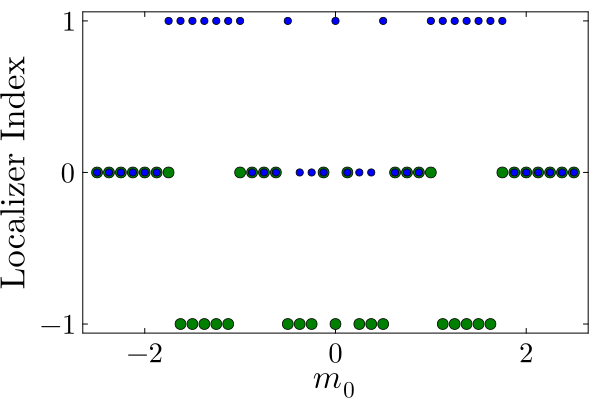

In [37]:
plt_localizer = scatter(m_0array, localizer_vals_all1, label="Localizer Index at point 1", 
    xlabel = L"m_0",
    ylabel = "Localizer Index",
    # title = "Localizer Index vs " * string(L"m_0"),
    size=(600, 400),
    color=:green,
    legend=false,
    markersize=6,
    grid=false,
    framestyle=:box,
    tickfont = font(18, "Computer Modern"),
    guidefont = font(22, "Computer Modern"),
    titlefont = font(24, "Computer Modern"),
    colorbar_tickfont = font(16, "Computer Modern"),
    colorbar_titlefont = font(18, "Computer Modern"),
    xticks=5,
    yticks=5)
plt_localizer = scatter!(m_0array, localizer_vals_all2, label="Localizer Index at point 2", 
                        color=:blue, markersize=4)

In [40]:
### save the data to a CSV file
### save m_0 vs localizer value for two points
isdir(string(folder_path,"localizer_index/")) || mkdir(string(folder_path,"localizer_index/"))
if exportdata==1
    df = DataFrame(m_0 = m_0array, localizer_val1 = localizer_vals_all1, localizer_val2 = localizer_vals_all2)  # Convert matrix to DataFrame
    CSV.write(string(folder_path,"localizer_index/","m0_vs_localizer", filename,".csv"), df, writeheader=false)
end

"data/HOTI/localizer_index/m0_vs_localizert0=1.0_t=1.0_Delta=1.0_x_periodic=0_y_periodic=0_L=60_m=0.6180339887498949_c1=-2_c2=4.5.csv.csv"

In [41]:
### Save the plot as pdf at the same location
isdir(string(folder_path,"localizer_index/")) || mkdir(string(folder_path,"localizer_index/"))
savefig(plt_localizer, string(folder_path,"localizer_index/","localizer_index_vs_m0_", filename, ".pdf"))

"/work/submit/archi137/Documents/GitHub/lattices-julia/data/HOTI/localizer_index/localizer_index_vs_m0_t0=1.0_t=1.0_Delta=1.0_x_periodic=0_y_periodic=0_L=60_m=0.6180339887498949_c1=-2_c2=4.5.csv.pdf"

In [34]:
t_end = time();

In [35]:
## Total time taken
println("Total time taken = ", t_end - t_start, " seconds")

Total time taken = 18983.01456093788 seconds
